In [1]:
import gzip
import struct
from array import array as pyarray

import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from regression import multiLogisticFit, multiLogisticPredict, logicError


In [2]:

samplesSize = [100, 100, 150, 500, 1000, 2000,
               3000, 4000, 6000, 8000, 10000, 40000, 60000]
testSize = [500, 600, 700, 800, 900, 1000,
            3000, 4000, 6000, 8000, 9000, 10000, 10000]
digits = np.arange(10)


def loadMNIST(imagePath, labelPath, size=1000, digits=np.arange(10)):
    """

    :param imagePath:
    :param labelPath:
    :param size:
    :param digits:
    :return:
    """
    N = size

    with gzip.open(labelPath, 'rb') as finf:
        magic_nr, size = struct.unpack(">II", finf.read(8))
        lbl = pyarray("b", finf.read())

        ind = [k for k in range(size) if lbl[k] in digits]
        labels = np.zeros((N, 1), dtype=np.int8)
        for i in range(N):
            labels[i] = lbl[ind[i]]
        finf.close()

    with gzip.open(imagePath, 'rb') as fimg:
        magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = pyarray("B", fimg.read())

        ind = [k for k in range(size) if lbl[k] in digits]
        images = np.zeros((N, rows * cols), dtype=np.float)

        for i in range(N):  # int(len(ind) * size/100.)):
            images[i] = np.array(img[ind[i] * rows * cols: (ind[i] + 1) * rows * cols]) \
                .reshape((rows * cols)) / 255.0

        fimg.close()

    labels = [label[0] for label in labels]
    return images, labels


MNISTImgTrain = "datasets/train-images-idx3-ubyte.gz"
MNISTLabelTrain = "datasets/train-labels-idx1-ubyte.gz"
MNISTImg = "datasets/t10k-images-idx3-ubyte.gz"
MNISTLabel = "datasets/t10k-labels-idx1-ubyte.gz"

# Test if the images are loaded correctly!
train_img, train_lbl = loadMNIST(MNISTImgTrain, MNISTLabelTrain, 5)


/tmp/ipykernel_114601/2428021409.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  images = np.zeros((N, rows * cols), dtype=np.float)


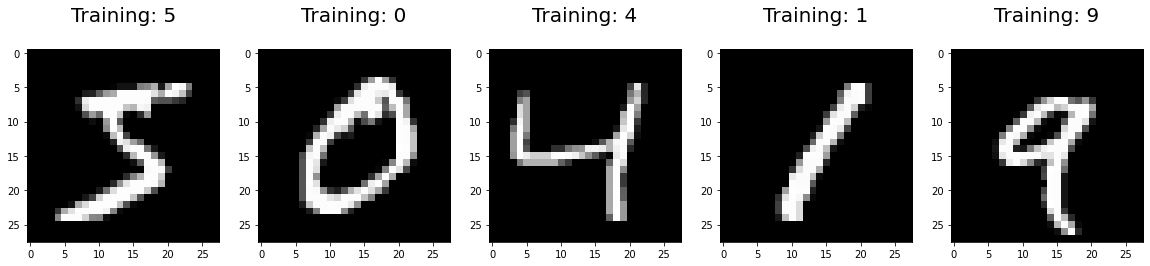

In [3]:

plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)
plt.show()


In [4]:

# 2 Regression model Logistic
for s, t in zip(samplesSize[::-1], testSize):
    X, y = loadMNIST(MNISTImgTrain, MNISTLabelTrain, 60000)
    tX, ty = loadMNIST(MNISTImg, MNISTLabel, t)
    logisticRegr = LogisticRegression(
        solver='lbfgs', verbose=1, n_jobs=4, max_iter=1000)

    logisticRegr.fit(X, y)
    predictions = logisticRegr.predict(tX)
    accuracy = logisticRegr.score(tX, ty)

    #
    y_pred_proba = logisticRegr.predict_proba(tX)
    fpr, tpr, _ = metrics.roc_curve(ty, y_pred_proba)

    cm = metrics.confusion_matrix(ty, predictions)
    print(cm)
    print("sklearn-LogisticRegression::" "train:", len(X),
          "test:", len(ty), "accuracy:", accuracy / len(ty))


/tmp/ipykernel_114601/2428021409.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  images = np.zeros((N, rows * cols), dtype=np.float)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7850     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38155D+05    |proj g|=  3.82390D+03


 This problem is unconstrained.



At iterate   50    f=  1.57649D+04    |proj g|=  1.52068D+02

At iterate  100    f=  1.45463D+04    |proj g|=  5.43585D+01

At iterate  150    f=  1.41741D+04    |proj g|=  1.51109D+01

At iterate  200    f=  1.40332D+04    |proj g|=  2.75146D+01

At iterate  250    f=  1.39720D+04    |proj g|=  1.22358D+01

At iterate  300    f=  1.39468D+04    |proj g|=  1.23873D+01

At iterate  350    f=  1.39353D+04    |proj g|=  3.18372D+00

At iterate  400    f=  1.39307D+04    |proj g|=  1.98477D+00

At iterate  450    f=  1.39287D+04    |proj g|=  2.68557D+00

At iterate  500    f=  1.39277D+04    |proj g|=  9.31960D-01

At iterate  550    f=  1.39274D+04    |proj g|=  1.63451D+00

At iterate  600    f=  1.39272D+04    |proj g|=  3.16010D-01

At iterate  650    f=  1.39271D+04    |proj g|=  2.45817D-01

At iterate  700    f=  1.39271D+04    |proj g|=  2.89945D-01

At iterate  750    f=  1.39271D+04    |proj g|=  8.96479D-02

At iterate  800    f=  1.39271D+04    |proj g|=  8.47656D-02

       

[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:  3.7min finished


ValueError: multiclass format is not supported

In [ ]:

# 2 Regression model Logistic from previous assignments
beta = np.zeros(28 * 28 + 1)

predictions = []
for s, t in zip(samplesSize, testSize):
    X, y = loadMNIST(MNISTImgTrain, MNISTLabelTrain, t)
    tX, ty = loadMNIST(MNISTImg, MNISTLabel, s)

    # Compute the best
    w, b = multiLogisticFit(X, y, 10)

    predicted = multiLogisticPredict(tX, b, w)
    score = logicError(predicted, ty)

    print("Logistic-Regression::" "train:", len(X),
          "test:", len(ty), "accuracy:", score)
# cm = metrics.confusion_matrix(ty, predicted)
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# print("Precision:", metrics.precision_score(y_test, y_pred))
# print("Recall:", metrics.recall_score(y_test, y_pred))
